In [5]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Logistic回归适用于二分类问题的统计方法，用来预测一个二元结果与一个或多个自变量之间的关系
# Logistic回归实际上是一种分类方法，通过预测事件发生的概率来完成分类任务

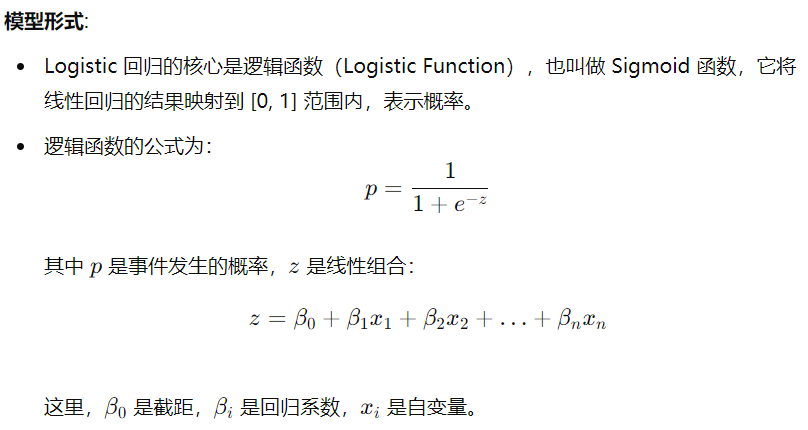

In [ ]:
# 目标：通过最大似然函数来估计回归系数
# 决策边界：设定概率阈值（通常为0.5）来进行分类

In [ ]:
# 模型评估
# 1、混淆矩阵：用于评估模型预测的性能，显示预测类别与实际类别的比较
# 2、准确率：正确分类的样本占总样本的比例
# 3、精准率：正确预测为正类样本占预测为正类样本的比例
# 4、召回率：正确预测为正类的样本占实际正类样本的比例
# 5、F1分数：精准率与召回率的调和平均值
# 6、ROC曲线：显示模型在不同阈值下的性能
# 7、AUC：曲线下面积表示模型的整体性能

In [7]:
affairs = pd.read_csv(r'c:\Users\Administrator\Downloads\affairs.csv', index_col=0)
affairs

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
4,0,male,37.0,10.00,no,3,18,7,4
5,0,female,27.0,4.00,no,4,14,6,4
11,0,female,32.0,15.00,yes,1,12,1,4
16,0,male,57.0,15.00,yes,5,18,6,5
23,0,male,22.0,0.75,no,2,17,6,3
...,...,...,...,...,...,...,...,...,...
1938,1,male,22.0,1.50,yes,1,12,2,5
1941,7,female,32.0,10.00,yes,2,18,5,4
1954,2,male,32.0,10.00,yes,2,17,6,5
1959,2,male,22.0,7.00,yes,3,18,6,2


In [8]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 4 to 9010
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 47.0+ KB


In [10]:
affairs['yaffairs'] = affairs['affairs'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
affairs

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,yaffairs
4,0,male,37.0,10.00,no,3,18,7,4,0
5,0,female,27.0,4.00,no,4,14,6,4,0
11,0,female,32.0,15.00,yes,1,12,1,4,0
16,0,male,57.0,15.00,yes,5,18,6,5,0
23,0,male,22.0,0.75,no,2,17,6,3,0
...,...,...,...,...,...,...,...,...,...,...
1938,1,male,22.0,1.50,yes,1,12,2,5,1
1941,7,female,32.0,10.00,yes,2,18,5,4,1
1954,2,male,32.0,10.00,yes,2,17,6,5,1
1959,2,male,22.0,7.00,yes,3,18,6,2,1


In [12]:
affairs.columns

Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating', 'yaffairs'],
      dtype='object')

In [14]:
affairs_model = smf.logit('yaffairs ~ gender + age + yearsmarried + children + religiousness + education + occupation + rating', data=affairs).fit()
affairs_model

Optimization terminated successfully.
         Current function value: 0.507080
         Iterations 6


In [15]:
affairs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               yaffairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      592
Method:                           MLE   Df Model:                            8
Date:                  周五, 16 8月 2024   Pseudo R-squ.:                 0.09753
Time:                        11:41:00   Log-Likelihood:                -304.76
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 3.252e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.3773      0.888      1.551      0.121      -0.363       3.117
gender[T.male]      0.2803      0.239      1.172      0.241      -0.188       0.749
children[T.yes]     0.3977      0.292      1.364      0.173      -0.174       0.969
age                -0.0443      0.018     -2.425      0.015      -0.080      -0.008
yearsmarried        0.0948      0.032      2.942      0.003       0.032       0.158
religiousness      -0.3247      0.090     -3.618      0.000      -0.501      -0.149
education           0.0211      0.051      0.417      0.677      -0.078       0.120
occupation          0.0309      0.072      0.431      0.667      -0.110       0.172
rating             -0.4685      0.091     -5.153      0.000      -0.647      -0.290
===================================================================================
"""

In [35]:
# 数据预处理
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [33]:
affairs.columns, affairs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 601 entries, 4 to 9010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
 9   yaffairs       601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 67.8+ KB


(Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
        'education', 'occupation', 'rating', 'yaffairs'],
       dtype='object'),
 None)

In [38]:
# 特征和目标向量
Y = affairs[['yaffairs']]
X = affairs[['gender', 'age', 'yearsmarried', 'children', 'religiousness', 'education', 'occupation', 'rating']]

In [39]:
# 创建独热编码转换器 这个很有用需要详细了解
preprocessor = ColumnTransformer(
    transformers = [('cat', OneHotEncoder(), ['gender', 'children'])],
    remainder = 'passthrough'
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(),
                                 ['gender', 'children'])])

In [51]:
X_transformed = preprocessor.fit_transform(X)
X_transformed

array([[ 0.,  1.,  1., ..., 18.,  7.,  4.],
       [ 1.,  0.,  1., ..., 14.,  6.,  4.],
       [ 1.,  0.,  0., ..., 12.,  1.,  4.],
       ...,
       [ 0.,  1.,  0., ..., 17.,  6.,  5.],
       [ 0.,  1.,  0., ..., 18.,  6.,  2.],
       [ 1.,  0.,  0., ..., 14.,  1.,  5.]])

In [52]:
affairs.iloc[1, :]

affairs               0
gender           female
age                27.0
yearsmarried        4.0
children             no
religiousness         4
education            14
occupation            6
rating                4
yaffairs              0
Name: 5, dtype: object

In [40]:
# 创建一个包含预处理和模型的管道
pipeline = Pipeline(
    steps = [('preprocessor', preprocessor), ('classifier', LogisticRegression())]
)
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'children'])])),
                ('classifier', LogisticRegression())])

In [42]:
affair_skmodel = pipeline.fit(X, Y)
affair_skmodel

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['gender', 'children'])])),
                ('classifier', LogisticRegression())])

In [53]:
# 混淆矩阵 confusion_matrix
confusion_matrix(Y, affair_skmodel.predict(X))

array([[435,  16],
       [128,  22]], dtype=int64)

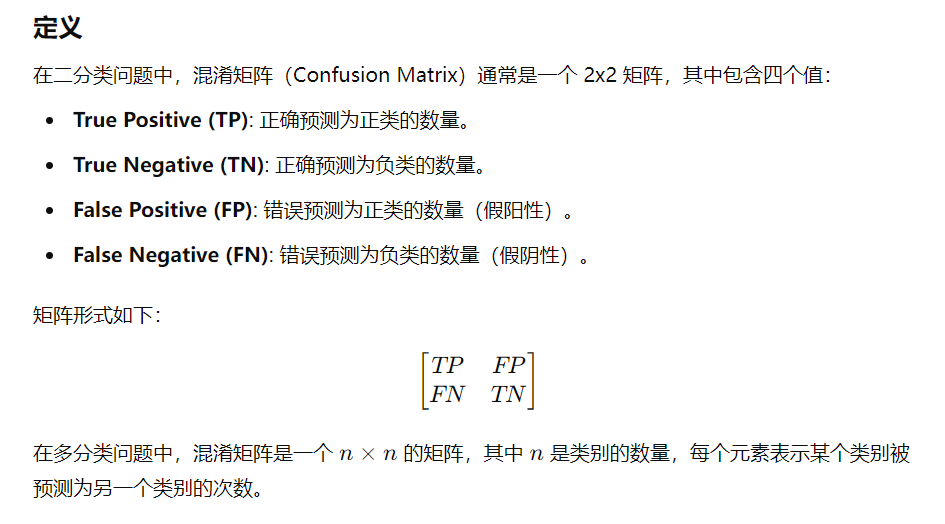

In [54]:
# 准确率 accuracy_score
# 正确分类的样本占总样本的比例
accuracy_score(Y, affair_skmodel.predict(X))

0.7603993344425957

In [60]:
# 分类报告 accuracy_score
# 要print出来
report = classification_report(Y, affair_skmodel.predict(X))
print(report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       451
           1       0.58      0.15      0.23       150

    accuracy                           0.76       601
   macro avg       0.68      0.56      0.55       601
weighted avg       0.72      0.76      0.70       601



##### 模型评估
##### 1、精准率：正确预测为正类样本占预测为正类样本的比例
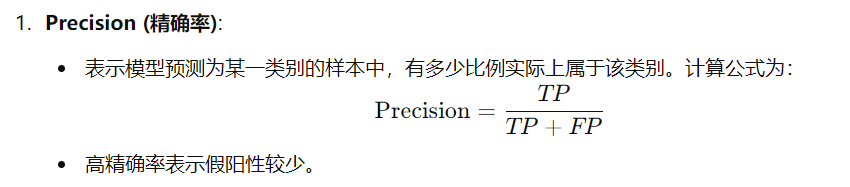
##### 2、召回率：正确预测为正类的样本占实际正类样本的比例
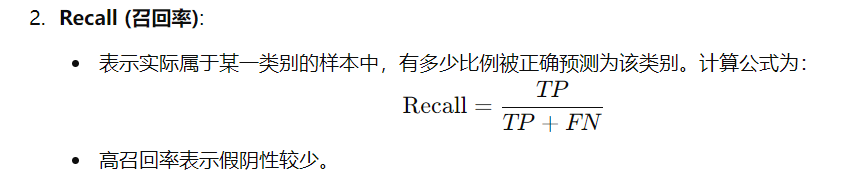
##### 3、F1分数：精准率与召回率的调和平均值
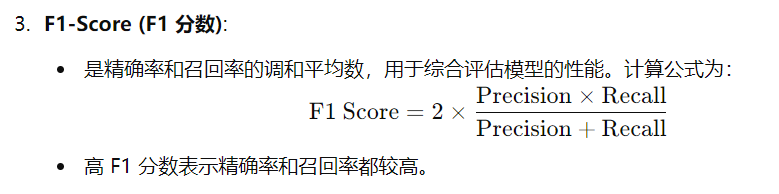
##### 4、准确率：正确分类的样本占总样本的比例
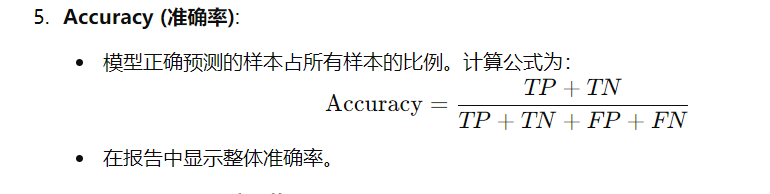
##### 5、Macro Average 宏平均
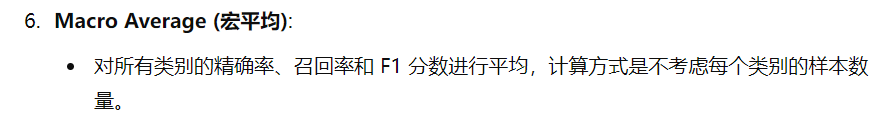
##### 6、WeightedAverage 加权平均
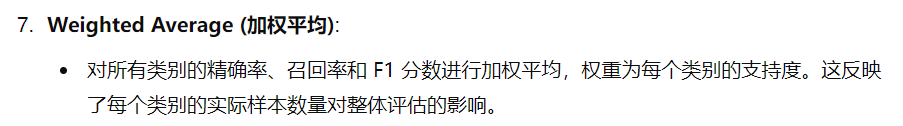

In [61]:
# gender，children，education，occupation影响不显著
affairs_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               yaffairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      592
Method:                           MLE   Df Model:                            8
Date:                  周五, 16 8月 2024   Pseudo R-squ.:                 0.09753
Time:                        16:02:10   Log-Likelihood:                -304.76
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 3.252e-11
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.3773      0.888      1.551      0.121      -0.363       3.117
gender[T.male]      0.2803      0.239      1.172      0.241      -0.188       0.749
children[T.yes]     0.3977      0.292      1.364      0.173      -0.174       0.969
age                -0.0443      0.018     -2.425      0.015      -0.080      -0.008
yearsmarried        0.0948      0.032      2.942      0.003       0.032       0.158
religiousness      -0.3247      0.090     -3.618      0.000      -0.501      -0.149
education           0.0211      0.051      0.417      0.677      -0.078       0.120
occupation          0.0309      0.072      0.431      0.667      -0.110       0.172
rating             -0.4685      0.091     -5.153      0.000      -0.647      -0.290
===================================================================================
"""

In [62]:
X_opt = affairs[['age', 'yearsmarried', 'religiousness', 'rating']]

affairs_model_opt = smf.logit('yaffairs ~  age + yearsmarried + religiousness + rating', data=affairs).fit()
affairs_model_opt

Optimization terminated successfully.
         Current function value: 0.511945
         Iterations 6


In [63]:
affairs_model_opt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               yaffairs   No. Observations:                  601
Model:                          Logit   Df Residuals:                      596
Method:                           MLE   Df Model:                            4
Date:                  周五, 16 8月 2024   Pseudo R-squ.:                 0.08887
Time:                        16:19:52   Log-Likelihood:                -307.68
converged:                       True   LL-Null:                       -337.69
Covariance Type:            nonrobust   LLR p-value:                 2.874e-12
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9308      0.610      3.164      0.002       0.735       3.127
age              -0.0353      0.017     -2.032      0.042      -0.069      -0.001
yearsmarried      0.1006      0.029      3.445      0.001       0.043       0.158
religiousness    -0.3290      0.089     -3.678      0.000      -0.504      -0.154
rating           -0.4614      0.089     -5.193      0.000      -0.635      -0.287
=================================================================================
"""

In [66]:
X_opt

,age,yearsmarried,religiousness,rating
4,37.0,10.00,3,4
5,27.0,4.00,4,4
11,32.0,15.00,1,4
16,57.0,15.00,5,5
23,22.0,0.75,2,3
...,...,...,...,...
1938,22.0,1.50,1,5
1941,32.0,10.00,2,4
1954,32.0,10.00,2,5
1959,22.0,7.00,3,2


In [68]:
affair_skmodel_opt = LogisticRegression().fit(X_opt, Y)

c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
report_opt = classification_report(Y, affair_skmodel_opt.predict(X_opt))
print(report_opt)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       451
           1       0.54      0.15      0.23       150

    accuracy                           0.76       601
   macro avg       0.65      0.55      0.54       601
weighted avg       0.71      0.76      0.70       601



In [83]:
# 卡方检验
# 1、目的
# 检验观察到的频数与期望频数之间额差异
# 在逻辑回归中，通常用于检验变量的显著性或模型的整体拟合优度
# 2、类型
# Pearson 卡方检验：用于检验类别数据中的广场频数和期望频数之间的差异
# 似然比卡方检验：用于比较两个模型的拟合优度

# 计算卡方检验
affairs_llf = affairs_model.llf #模型的对数似然值
affairs_opt_llf = affairs_model_opt.llf #优化模型的对数似然值

affairs_num_params = affairs_model.df_model + 1
affairs_opt_num_params = affairs_model_opt.df_model + 1

chi2_stat = 2 * (affairs_llf - affairs_opt_llf)
p_value = 1 - stats.chi2.cdf(chi2_stat, affairs_num_params - affairs_opt_num_params)

In [84]:
chi2_stat, p_value

(5.847417870955837, 0.21083665926768969)